## Homework 3
# Dassilva Petit
CS6682 Machine Learning

Troy University


In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

# Data analysis 

In [2]:
weatherAUS= pd.read_csv('C:/Users/dassi/Downloads/weatherAUS.CSV')

In [3]:
weatherAUS.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


After review the Data, I realize there was a lot of string in the date:

    1. I need the prep the data
    
    2. I need to Drop the column the I don't need. 

In [4]:
weatherAUS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

<Axes: xlabel='Date', ylabel='count'>

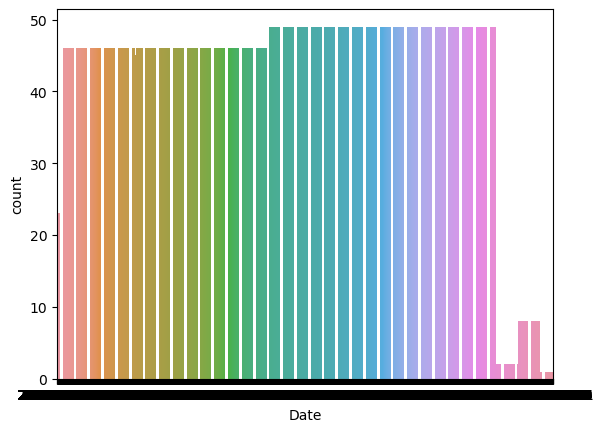

In [5]:
sns.countplot(x='Date', data=weatherAUS)

<Axes: xlabel='Date', ylabel='count'>

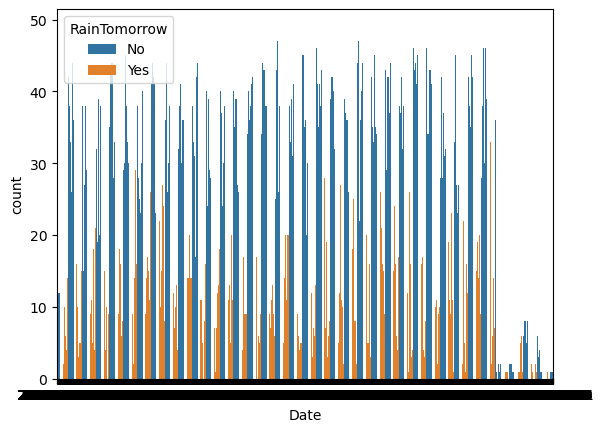

In [6]:
sns.countplot(x='Date', hue='RainTomorrow', data=weatherAUS)

In [7]:
weatherAUS.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


I need to find out which column has missing. if 80% of the data was missing, I was going to Drop the column

<Axes: >

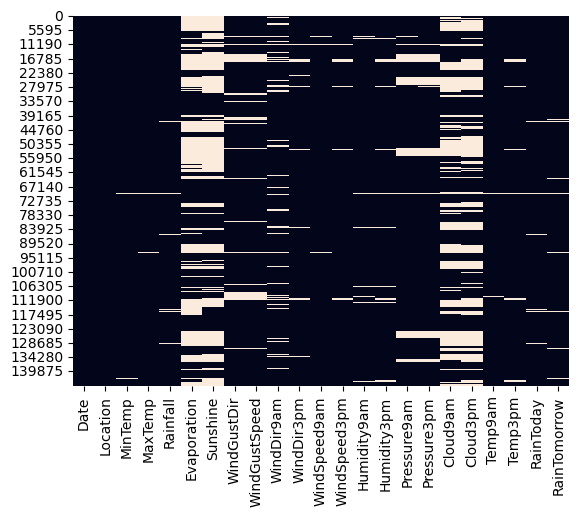

In [8]:
sns.heatmap(weatherAUS.isnull(), cbar=False)

I run into a problem at the end of the Logistic Regression.

1. I drop Date column and run it with everyting else I couldn't get through

2. I came back and drop all the column date had missing data, and it didn't work.

3. I try to covert the string in all the date, and it didn't work. after exhausted all possibilities. 


In [9]:
weatherAUS.drop(['MaxTemp', 'WindGustSpeed', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'Location', 'RainToday', 'Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm', 'Date'], axis=1, inplace=True)

In [10]:
weatherAUS.head()

,MinTemp,Rainfall,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainTomorrow
0,13.4,0.6,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No
1,7.4,0.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No
2,12.9,0.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No
3,9.2,0.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No
4,17.5,1.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No


In [11]:
weatherAUS.RainTomorrow = [1 if value == "No" else 0 for value in weatherAUS.RainTomorrow]

In [12]:
weatherAUS.head()

,MinTemp,Rainfall,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainTomorrow
0,13.4,0.6,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,1
1,7.4,0.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,1
2,12.9,0.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,1
3,9.2,0.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,1
4,17.5,1.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,1


<Axes: >

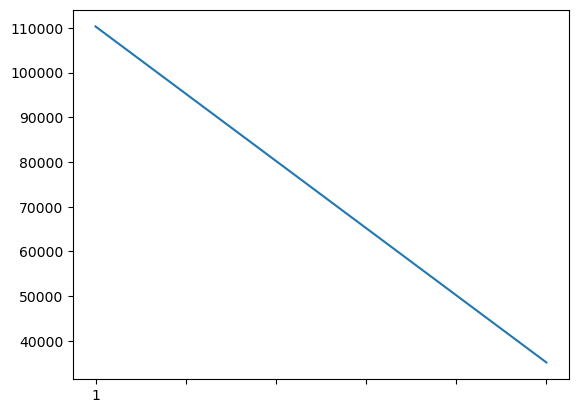

In [13]:
weatherAUS["RainTomorrow"] = weatherAUS['RainTomorrow'].astype("category", copy=False)
weatherAUS["RainTomorrow"].value_counts().plot()

In [14]:
weatherAUS.RainTomorrow

0         1
1         1
2         1
3         1
4         1
         ..
145455    1
145456    1
145457    1
145458    1
145459    0
Name: RainTomorrow, Length: 145460, dtype: category
Categories (2, int64): [0, 1]

In [15]:
y = weatherAUS["RainTomorrow"]
X = weatherAUS.drop(["RainTomorrow"], axis = 1)

In [16]:
y

0         1
1         1
2         1
3         1
4         1
         ..
145455    1
145456    1
145457    1
145458    1
145459    0
Name: RainTomorrow, Length: 145460, dtype: category
Categories (2, int64): [0, 1]

In [17]:
X

,MinTemp,Rainfall,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
0,13.4,0.6,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8
1,7.4,0.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3
2,12.9,0.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2
3,9.2,0.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5
4,17.5,1.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...
145455,2.8,0.0,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4
145456,3.6,0.0,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5
145457,5.4,0.0,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1
145458,7.8,0.0,13.0,7.0,51.0,24.0,1019.4,1016.5,15.1,26.0


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
x_training_data = X_train
y_training_data = y_train

In [20]:
x_training_data.columns = x_training_data.columns.astype(str)

In [21]:
x_training_data = x_training_data.values

In [22]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

I try to fix the data:

1. from sklearn.impute import SimpleImputer

2. sklearn.preprocessing import LabelEncoder

# I was unable to find the problem

In [23]:
model.fit(x_training_data, y_training_data)


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
predictions = model.predict(x_test_data)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test_data, predictions

In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test_data, predictions))